In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import medfilt
from scipy.fftpack import fft, fftfreq, ifft
file_path = "sound_sample_voicenoised.wav"
y, sr = librosa.load(file_path, sr=None)

In [2]:
y.shape

(97879,)

In [8]:
a = librosa.stft(y)
a

array([[-2.3113036e+00+0.0000000e+00j, -1.9396450e+01+0.0000000e+00j,
        -4.3333443e+01+0.0000000e+00j, ...,
         1.9656590e-01+0.0000000e+00j,  1.9889043e-01+0.0000000e+00j,
         2.2275001e-02+0.0000000e+00j],
       [-1.1933008e+00-1.9873241e+00j,  5.9909554e+00-1.4350615e+01j,
         2.9738688e+01-9.4187346e+00j, ...,
        -1.7585170e-01+6.8590984e-02j, -1.6414721e-01-7.6144278e-02j,
         6.7432299e-02-9.5643722e-02j],
       [ 1.2703387e+00-1.7628185e+00j,  4.1404881e+00+5.4344811e+00j,
        -7.3090749e+00+7.4639015e+00j, ...,
         2.2733421e-03+1.7191851e-01j,  1.8501547e-01-1.0439150e-02j,
        -1.3083878e-01+3.8149992e-03j],
       ...,
       [-2.0709768e-02-4.0819813e-03j,  3.9748006e-02+2.2865348e-02j,
        -2.1089963e-03-2.6101319e-02j, ...,
        -1.3419541e-02-5.3822860e-04j,  3.3795156e-03+3.0242335e-03j,
        -6.7714544e-05-4.0153596e-03j],
       [ 3.6280975e-03-2.1619491e-02j, -5.4445181e-02-1.4868449e-02j,
        -1.1162285e-02

In [10]:
len(a[1])

192

In [11]:
#perform STFT to audio signal, and get the audio magnitude & phase
S_full, phase = librosa.magphase(librosa.stft(y))

In [12]:
S_full.shape

(1025, 192)

In [13]:
S_full

array([[2.3113036e+00, 1.9396450e+01, 4.3333443e+01, ..., 1.9656590e-01,
        1.9889043e-01, 2.2275001e-02],
       [2.3180647e+00, 1.5550939e+01, 3.1194582e+01, ..., 1.8875524e-01,
        1.8094823e-01, 1.1702494e-01],
       [2.1728528e+00, 6.8320737e+00, 1.0446646e+01, ..., 1.7193353e-01,
        1.8530974e-01, 1.3089439e-01],
       ...,
       [2.1108221e-02, 4.5855511e-02, 2.6186384e-02, ..., 1.3430329e-02,
        4.5350981e-03, 4.0159305e-03],
       [2.1921804e-02, 5.6438893e-02, 5.7792187e-02, ..., 1.0681456e-02,
        5.7166484e-03, 2.2510909e-03],
       [2.1918787e-02, 5.8295231e-02, 1.6360901e-02, ..., 3.1799972e-03,
        3.4773143e-03, 2.3609373e-05]], dtype=float32)

In [15]:
S_full[1].shape

(192,)

In [18]:
#estimating noise power of the audio signal
noise_power = np.mean(S_full[:, :], axis=1)
noise_power

array([0.75947565, 0.5783003 , 0.29132995, ..., 0.01132739, 0.01341516,
       0.01142862], dtype=float32)

In [19]:
noise_power.shape

(1025,)

In [23]:
#create a mask to identify when signal magnitude exceeds the estimated noise power
#smooth the mask using a median filter to avoid abrupt changes.
mask = S_full > noise_power[:, None]
mask = mask.astype(float)
# mask = medfilt(mask, kernel_size=(1, 5))
s_clean = S_full * mask

In [24]:
mask

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [21]:
#inverse STFT to convert the cleaned magnitude data back to the time domain
y_clean = librosa.istft(s_clean * phase)

In [33]:
#save audio to wav format
# sf.write("stft_filtered_6.wav", y_clean, sr)

In [26]:
t = np.array(range(0, len(y))) / sr
len(t)


97879

In [38]:
print("Length of t:", len(t))
print("Length of y_clean.real:", len(y_clean.real))

Length of t: 97879
Length of y_clean.real: 97792


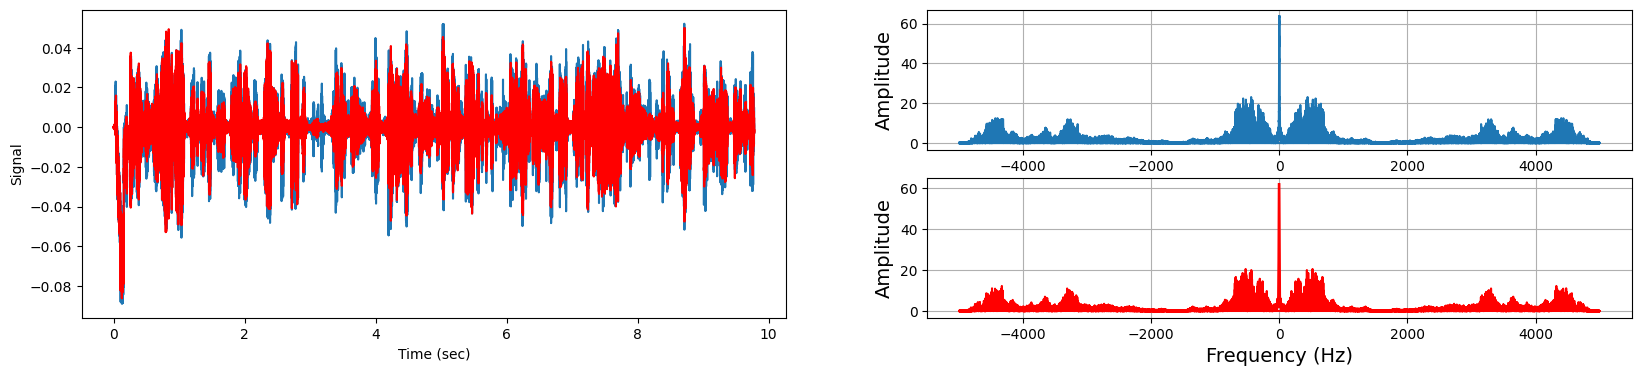

In [31]:
yhat = fft(y)
yhat_clean = fft(y_clean)
Fcycles=fftfreq(len(y),1/sr)

fig = plt.figure(figsize=(20, 4))
gs=fig.add_gridspec(2,2)

ax1=fig.add_subplot(gs[:,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[1,1])

ax1.plot(t[:len(y_clean.real)],y[:len(y_clean.real)],label='Input')
ax1.plot(t[:len(y_clean.real)],y_clean.real[:len(y_clean.real)],label='output', color='r')
ax1.set_xlabel('Time (sec)')
ax1.set_ylabel('Signal')

# ax2.plot(xf, 2.0 / n * np.abs(yf[:n // 2]))
ax2.plot(Fcycles[:len(y)], np.absolute(yhat)[:len(y)])
ax2.set_xlabel('Frequency (Hz)',fontsize=14)
ax2.set_ylabel('Amplitude',fontsize=14)
ax2.grid()

ax3.plot(Fcycles[:len(yhat_clean)], np.absolute(yhat_clean), color='r')
ax3.set_xlabel('Frequency (Hz)',fontsize=14)
ax3.set_ylabel('Amplitude',fontsize=14)
ax3.grid()

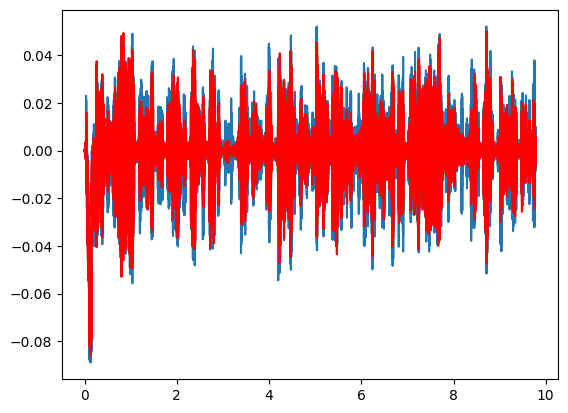

In [33]:
plt.plot(t[:len(y_clean.real)],y[:len(y_clean.real)],label='Input')
plt.plot(t[:len(y_clean.real)],y_clean.real[:len(y_clean.real)],label='output', color='r')